<a href="https://colab.research.google.com/github/katsuba-mikhail/learn-kaggle/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TABLE OF CONTENTS

>[Sources](#scrollTo=iyD_UOe5sMta)

>[Imports](#scrollTo=Rf00sMqfcq26)

>[Installing the Kaggle API in Colab](#scrollTo=DIf2PtekjPtY)

>[Authenticating with Kaggle using kaggle.json](#scrollTo=hMY4CFezjcG-)

>[Using the Kaggle API](#scrollTo=HMk7Zz4ZkpCe)

>[Titanic - Machine Learning from Disaster](#scrollTo=HkvkC3oR4wBI)

>>[Downloading a dataset](#scrollTo=dNke00r6ig3h)

>[Getting information about datasets](#scrollTo=hVL66v253vol)

>[Analyze data](#scrollTo=jZROc6rzz0CP)

>>[Getting dataset structure](#scrollTo=59pvIkygOjE4)

>>[Analysis of empty values](#scrollTo=3n5PkM-yPGnM)

>>[Analysis of influence factors](#scrollTo=Mavrn8xvPZX0)

>[Prepare data](#scrollTo=vr8k4DLr0Goe)

>>[Fill NULL](#scrollTo=wBE6sQBqIH6V)

>>[Convert formats](#scrollTo=5-gGepCu_-aE)

>[Modeling](#scrollTo=s-y7nOMY0Lcl)

>>[Logistic Regression](#scrollTo=hd8JZoX90cfG)

>>[Support Vector Machines](#scrollTo=kSu2u5Ic7zJx)

>>[Linear SVC](#scrollTo=hT8jAOn9mk66)

>>[k-Nearest Neighbors](#scrollTo=pdQU_wrT96gF)

>>[Gaussian Naive Bayes](#scrollTo=e8qx9RkX-_Nr)

>>[Perceptron](#scrollTo=QIQ3W0yOlNEY)

>>[Stochastic Gradient Descent](#scrollTo=rwELOaOXnV-J)

>>[Decision Tree](#scrollTo=ftIxZFUJn-Px)

>>[Random Forest](#scrollTo=jaPVq2jJ0fGw)

>>[Mass modeling](#scrollTo=8yqBLrUZz3l5)

>>[GridSearch](#scrollTo=oPjCW6xJlYk5)

>>>[Random Forest](#scrollTo=IvrAro43r2dw)

>>>[AdaBoosts](#scrollTo=nd0LV2oq8eD_)

>>>[Voting Classiffier](#scrollTo=WfOPsPW4DQ8i)

>[Results](#scrollTo=YS06kWVp8jbC)

>[Output](#scrollTo=8hCZNrfc8mmA)



# Sources

* [Detailed and typical solution (ensemble modeling)](https://www.kaggle.com/code/odaymourad/detailed-and-typical-solution-ensemble-modeling)
* [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)

# Imports

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn import model_selection
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys
print(f'python: {sys.version}')

import IPython
print(f'IPython: {IPython.__version__}')

print(f'pandas: {pd.__version__}')

import sklearn
print(f'sklearn: {sklearn.__version__}')

import xgboost
print(f'xgboost: {xgboost.__version__}')

print(f'seaborn: {sns.__version__}')

import matplotlib
print(f'matplotlib {matplotlib.__version__}')

python: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
IPython: 7.9.0
pandas: 1.3.5
sklearn: 1.0.2
xgboost: 0.90
seaborn: 0.11.2
matplotlib 3.2.2


# Installing the [Kaggle API](https://github.com/Kaggle/kaggle-api) in Colab

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


# Using the Kaggle API

For a more complete list of what you can do with the API, visit https://github.com/Kaggle/kaggle-api.

# [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

## Downloading a dataset

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.5MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train_df = pd.read_csv('train.csv')
train_raw = train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv("test.csv")
test_raw = test_df
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
example_df = pd.read_csv("gender_submission.csv")
example_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Getting information about datasets

<h3>Data Dictionary</h3>
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<h3>Variable Notes</h3>

<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

# Analyze data

## Getting dataset structure

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Analysis of empty values

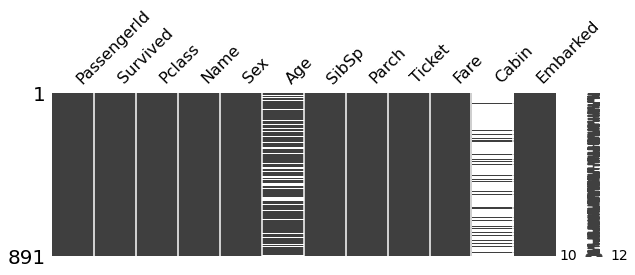

In [ ]:
missingno.matrix(train_df, figsize=(10, 3))

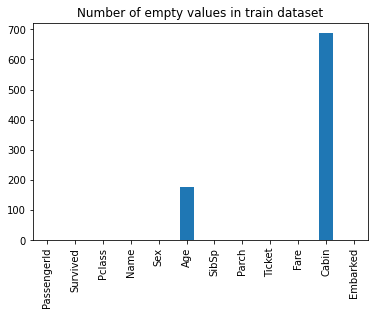

In [ ]:
train_df.isnull().sum().plot(kind='bar', title='Number of empty values in train dataset')

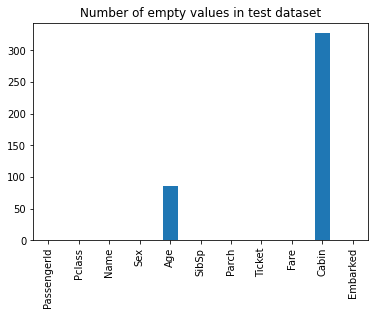

In [ ]:
test_df.isnull().sum().plot(kind='bar', title='Number of empty values in test dataset')

In [ ]:
train_df[train_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


## Analysis of influence factors

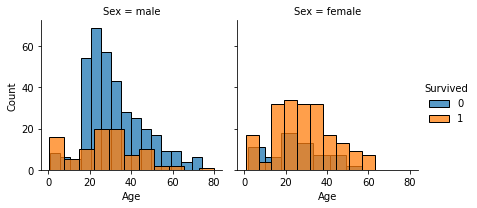

In [ ]:
graph = sns.FacetGrid(train_df, col='Sex', hue='Survived')
graph.map(sns.histplot, 'Age')
graph.add_legend()

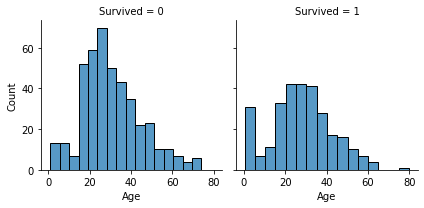

In [ ]:
graph = sns.FacetGrid(train_df, col='Survived')
graph.map(sns.histplot, 'Age')

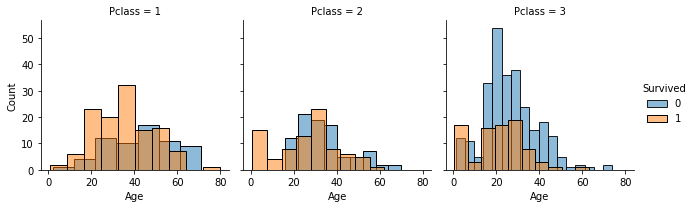

In [ ]:
graph = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
graph.map(sns.histplot, 'Age', alpha=0.5)
graph.add_legend()

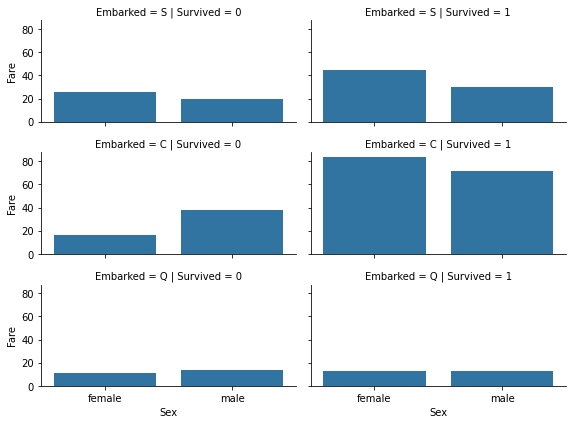

In [ ]:
graph = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2, aspect=2)
graph.map(sns.barplot, 'Sex', 'Fare', ci=None, order=['female', 'male'])
graph.add_legend()

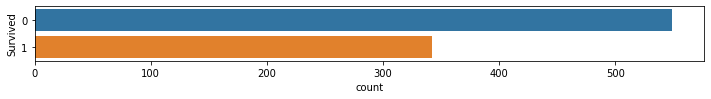

In [ ]:
plt.figure(figsize=[12, 1])
sns.countplot(y='Survived', data=train_df)

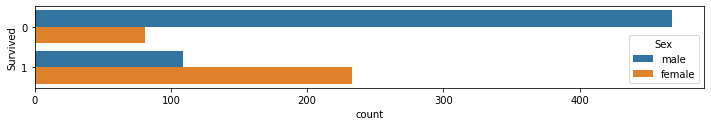

In [ ]:
plt.figure(figsize=[12, 1.5])
sns.countplot(y='Survived', hue='Sex', data=train_df)

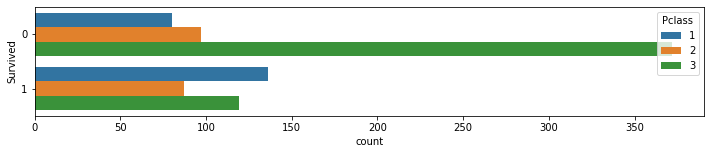

In [ ]:
plt.figure(figsize=[12, 2])
sns.countplot(y='Survived', hue='Pclass', data=train_df)

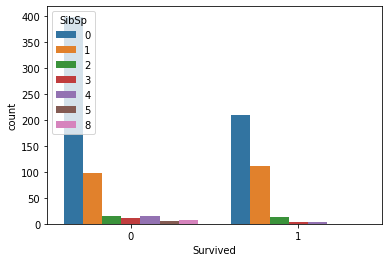

In [ ]:
sns.countplot(x='Survived', hue='SibSp', data=train_df)

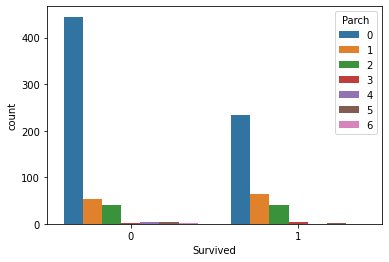

In [ ]:
sns.countplot(x='Survived', hue='Parch', data=train_df)

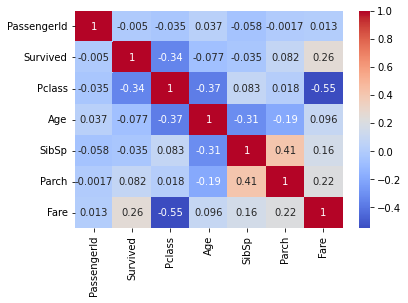

In [ ]:
sns.heatmap(train_df.corr(), annot=True, fmt='.2g', cmap='coolwarm')

# Prepare data

In [ ]:
prepare_data = [train_raw, test_raw]

## Fill NULL

There are empty values in the dataset:
* `Age` and `Fare` values can be filled with a median.
* `Embarked` values can be filled with the most frequent value.

In [ ]:
for dataset in prepare_data:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

drop_column = ['PassengerId', 'Cabin', 'Ticket']
train_raw.drop(drop_column, axis=1, inplace=True)

print(train_raw.isnull().sum())
print('=' * 20)
print(test_raw.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## Convert formats

Аccording to the influence analysis, values are selected for training: 
'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Age'

In [ ]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Age']

In [ ]:
Y_train = train_df['Survived']

In [ ]:
X_train = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])
X_train.head()

,Pclass,SibSp,Parch,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,0,1,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,3,0,0,26.0,1,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,3,0,0,35.0,0,1,0,0,1


# Modeling

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
scr_log = round(logreg.score(X_train, Y_train) * 100, 2)
scr_log

79.8

## Support Vector Machines

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
scr_svc = round(svc.score(X_train, Y_train) * 100, 2)
scr_svc

66.11

## Linear SVC

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
scr_linsvc = round(linear_svc.score(X_train, Y_train) * 100, 2)
scr_linsvc

75.08

## k-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
scr_knn = round(knn.score(X_train, Y_train) * 100, 2)
scr_knn

87.43

## Gaussian Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
scr_gaus = round(gaussian.score(X_train, Y_train) * 100, 2)
scr_gaus

79.12

## Perceptron

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
scr_perc = round(perceptron.score(X_train, Y_train) * 100, 2)
scr_perc

75.65

## Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
scr_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
scr_sgd

71.72

## Decision Tree

## Random Forest

In [ ]:
rndfrt = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rndfrt.fit(X_train, Y_train)
prediction = rndfrt.predict(X_test)
scr_rf = round(rndfrt.score(X_train, Y_train) * 100, 2)
scr_rf

83.61

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train, Y_train)
prediction = xgbc.predict(X_test)
scr_xgbc = round(xgbc.score(X_train, Y_train) * 100, 2)
scr_xgbc

85.86

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
scr_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
scr_tree

93.6

## Mass modeling

Automatic evaluation of various models

In [ ]:
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, 
                                         train_size=0.6, random_state=0)

MLA = [
    LogisticRegression(),
    RandomForestClassifier(),
    Perceptron(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    SGDClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    BernoulliNB(),
    LinearDiscriminantAnalysis()
]

MLA_columns = ['MLA name', 'MLA parameters', 'MLA test accuracy mean', 
               'MLA test accuracy mean x3 STD', 'MLA time']

MLA_compare = pd.DataFrame(columns=MLA_columns)
MLA_predict = train_df['Survived']

row_index = 0
for alg in MLA:
    
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv=cv_split)
    MLA_compare.loc[row_index, 'MLA test accuracy mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA test accuracy mean x3 STD'] = cv_results['test_score'].std() * 3
    MLA_compare.loc[row_index, 'MLA time'] = cv_results['fit_time'].mean()

    row_index += 1

MLA_compare.sort_values(by='MLA test accuracy mean', ascending=False, inplace=True)
MLA_compare

,MLA name,MLA parameters,MLA test accuracy mean,MLA test accuracy mean x3 STD,MLA time
8,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.823881,0.055701,0.06888
9,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.823134,0.066073,0.195866
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.802612,0.059539,0.088151
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.798134,0.067061,0.366533
7,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.794776,0.055294,0.005044
13,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.79403,0.048742,0.007825
12,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.78806,0.043006,0.00454
10,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.786567,0.050757,0.293013
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.784328,0.070407,0.004094
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.780224,0.071581,0.007682


## GridSearch

In [ ]:
kfold = StratifiedKFold(n_splits=10)

RFC = RandomForestClassifier()

RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Random Forest

In [ ]:
rf_param_grid = {
    "max_depth": [None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators": [100, 300],
    "criterion": ["gini"]
}

gsRFC = GridSearchCV(RFC, param_grid=rf_param_grid, cv=kfold, scoring="accuracy",
                     n_jobs=4, verbose=1)

gsRFC.fit(X_train, Y_train)

RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8282896379525594

### AdaBoosts

In [ ]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {
    "base_estimator__criterion": ["gini", "entropy"],
    "base_estimator__splitter": ["best", "random"],
    "algorithm": ["SAMME", "SAMME.R"],
    "n_estimators": [1, 2],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]
}

gsadaDTC = GridSearchCV(adaDTC, param_grid=ada_param_grid, cv=kfold,
                        scoring="accuracy", n_jobs=4, verbose=1)

gsadaDTC.fit(X_train, Y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


0.7946941323345816

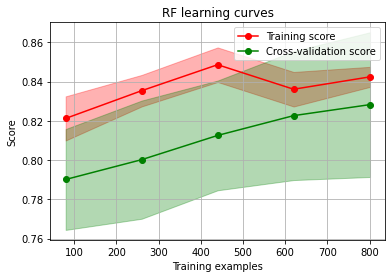

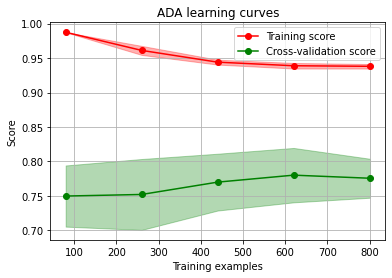

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    """Generate plot test and training values"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_, "RF learning curves", 
                        X_train, Y_train, cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_, "ADA learning curves",
                        X_train, Y_train, cv=kfold)

### Voting Classiffier

In [ ]:
test_data = pd.read_csv('train.csv')
test_data.drop(['Parch', 'SibSp', 'Name'], axis=1 , inplace = True)    

Test = test_data.drop(labels = ["PassengerId"],axis = 1)

votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('adac', ada_best)], 
                           voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)
test_Survived = pd.Series(votingC.predict(X_test), name="Survived")

results = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':test_Survived})

results.to_csv('submission.csv', index=False)
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


# Results

In [ ]:
scores = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Support Vector Machines', 
              'Random Forest', 
              'k-Nearest Neighbors', 
              'Gaussian Naive Bayes',
              'Perceptron',
              'Linear SVC',
              'Stochastic Gradiatn Descent', 
              'Decision Tree'],
    'Score': [scr_log, scr_svc, scr_rf, scr_knn, scr_gaus, scr_perc, scr_linsvc,
              scr_sgd, scr_tree]
})

scores.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,93.60
3,k-Nearest Neighbors,87.43
2,Random Forest,83.61
0,Logistic Regression,79.80
4,Gaussian Naive Bayes,79.12
5,Perceptron,75.65
6,Linear SVC,75.08
7,Stochastic Gradiatn Descent,71.72
1,Support Vector Machines,66.11


# Output

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
prediction = decision_tree.predict(X_test)
scr_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
scr_tree

93.6

In [ ]:
output = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':prediction})
output.to_csv('submission.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
